Input Data

In [0]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import DataLoader, TensorDataset

# Loading training data
data = pd.read_csv("data_train.csv")
x_data_train = np.array(data.iloc[:, 0:-1]) 
y_data_train = np.array(data.iloc[:,[-1]]) 
x_train = torch.from_numpy(x_data_train).float() 
y_train = torch.from_numpy(y_data_train).float()
 
 
# Loading testing data
data = pd.read_csv("data_test.csv")
x_data_test = np.array(data.iloc[:, 0:-1])
y_data_test = np.array(data.iloc[:,[-1]])


Training Data


In [0]:
m = len(y_data_train) 
n = 3 
batch_size = 50
 
train_ds = TensorDataset(x_train, y_train) 
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
 
# Linear Regression model with 3 weights, 1 bias 
model = nn.Linear(3, 1, True) 

learningRate = 0.00001 
epochs = 1000 
losses = [] 
final_loss = 0 
t0 = [] 
t1 = [] 
t2 = [] 
t3 = []

# Initializing loss function and optimizer 
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

# Training the model 
for epoch in range(epochs):  
  for xb, xy in train_dl:    
    y_pred = model(xb)    
    loss = criterion(y_pred, xy)/2    
    # print('epoch: ', epoch, '\tloss: ', loss.item())    
    losses.append(loss.item())    
    optimizer.zero_grad()    
    loss.backward()    
    if epoch == epochs:      
      final_loss = loss.item()    
    optimizer.step()


 # Get model parameters  
  for i, j in enumerate(model.parameters()):    
   if j.requires_grad:      
     if i == 0: # Weights        
       t1.append(j.data.numpy()[0][0])        
       t2.append(j.data.numpy()[0][1])        
       t3.append(j.data.numpy()[0][2])      
     else: # Bias
       t0.append(j.data.item())
 

Objective Function

In [0]:
# Cost Function (Objective Function) 
def J(x_data, y_data, t0, t1, t2, t3):  
  s = 0.0  
  for i in range(m):    
    s += (t0 + t1 * x_data[i][0] + t2 * x_data[i][1] + t3 * x_data[i][2]  - y_data[i]) ** 2
    return s / (2 * m)
  
cost_train = [] 
cost_test = [] 
for i in range(len(t0)):  
 cost_train.append(J(x_data_train, y_data_train, t0[i], t1[i], t2[i], t3[i]))
 cost_test.append(J(x_data_test, y_data_test, t0[i], t1[i], t2[i], t3[i]))

Plot the results

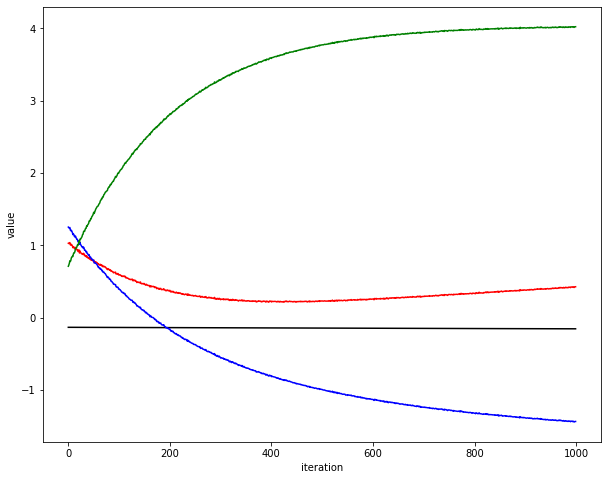

In [4]:
# Plot θ0 ,θ1 ,θ2 ,θ3 
plt.figure(figsize=(10, 8)) 
plt.plot(t0, color='black') 
plt.plot(t1, color='red') 
plt.plot(t2, color='blue') 
plt.plot(t3, color='green') 
plt.xlabel('iteration') 
plt.ylabel('value') 
plt.show()
